In [3]:
# 将文件夹中的人脸进行检测并且裁剪

In [4]:
# 导入包
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 549.5, 599.5, -0.5)

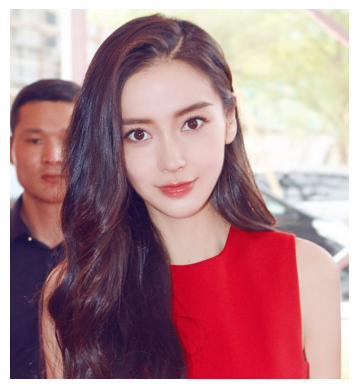

In [5]:
# 读取图片
img = cv2.imread("./images/ab.jpg")
# 展示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis(False)

In [6]:
# 加载检测模型
face_detector = cv2.dnn.readNetFromCaffe('./weights/deploy.prototxt.txt','./weights/res10_300x300_ssd_iter_140000.caffemodel')

In [7]:
def getCropedFace(img_file, conf_thresh=0.5):
    """
    将图片进行人脸裁剪
    @param:
        img_file: str 文件名
        conf_thresh: float 置信度预支
        w_thresh,h_thresh: 人脸长度宽度阈值，小于它则丢弃
    @return
        croped_face: numpy img 裁剪后的人脸，如果没有符合条件的，则返回None
    """
    # 读取图片
    # img = cv2.imread(img_file)
    # 解决中文路径
    img = cv2.imdecode(np.fromfile(img_file, dtype=np.uint8), -1)
    if img is None:
        return None
    # 画面原来的高度和宽度
    img_height,img_width = img.shape[:2]
    # 缩放图片
    img_resize = cv2.resize(img,(300,300))
    # 图像转为blob
    img_blob = cv2.dnn.blobFromImage(img_resize,1.0,(300,300),(104.0, 177.0, 123.0))
    # 输入
    face_detector.setInput(img_blob)
    # 推理
    detections = face_detector.forward()
    # 检测人脸数量
    num_of_detections = detections.shape[2]
    # 遍历人脸
    for index in range(num_of_detections):
        # 置信度
        detection_confidence = detections[0,0,index,2]
        # 挑选置信度，找到一个人返回
        if detection_confidence > conf_thresh:
            # 位置
            locations = detections[0,0,index,3:7] * np.array([img_width,img_height,img_width,img_height])
            # 矩形坐标
            l,t,r,b  = locations.astype('int')
            # 长度宽度判断
            w = r - l
            h = b - t
            # print(w,h)
            croped_face = img[t:b,l:r]
            return croped_face
                
    # 都不满足
    return None


In [8]:
croped_face = getCropedFace('./images/ab.jpg')

(-0.5, 173.5, 252.5, -0.5)

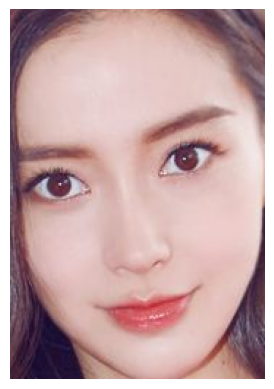

In [10]:
plt.imshow(cv2.cvtColor(croped_face,cv2.COLOR_BGR2RGB))
plt.axis(False)

In [12]:
# 目标：chinese_faces中的所有人脸进行裁剪，输出到chinese_faces_cleaned文件夹

# 路径：chinese_faces/人名/图片文件.jpg

# 1.遍历chinese_faces下的所有文件夹（人名）
# 2.遍历A文件夹下所有图片文件
# 3.图片文件逐一处理
# 4.处理后的图片存到chinese_faces_cleaned，路径仍然保持：chinese_faces_cleaned/人名/图片文件.jpg

In [13]:
import glob,tqdm,os

In [16]:
# 获取人名列表
person_list = glob.glob('./chinese_faces/*')

In [17]:
len(person_list)

40

In [18]:
# 遍历人名
for person in tqdm.tqdm( person_list ,desc='处理中...'):
    # 获取人名（这里需要根据自己系统来改一下，Windows用\\，Unix系系统用/））
    person_class = person.split('\\')[-1]
    # 创建需要保存的目录
    save_dir = './chinese_faces_cleaned/'+person_class
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # 获取该人名下的所有图片
    file_name = person+'/*.jpg'
    img_list = glob.glob(file_name)
    # 遍历图片
    for img_file in img_list:
        # 处理图片
        croped_face = getCropedFace(img_file)
        if croped_face is not None:
            # 获取文件名（这里需要根据自己系统来改一下，Windows用\\，Unix系系统用/））
            file_name = img_file.split('\\')[-1]
            save_file_name = save_dir+'/'+file_name
            # 保存，同样要解决中文路径
            # cv2.imwrite(save_file_name,croped_face)
            cv2.imencode('.jpg', croped_face)[1].tofile(save_file_name) 
    


处理中...: 100%|██████████| 40/40 [00:07<00:00,  5.37it/s]
